<a href="https://www.kaggle.com/code/nyagami/flood-prediction-eda?scriptVersionId=180716572" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
!pip install lazypredict

from lazypredict.Supervised import LazyRegressor
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Preprocessing
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Options
pd.set_option('display.max_columns',50)
plt.style.use('bmh')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv', index_col ='id')
test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv', index_col ='id')

# Preview datasets

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null  int6

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745305 entries, 1117957 to 1863261
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   MonsoonIntensity                 745305 non-null  int64
 1   TopographyDrainage               745305 non-null  int64
 2   RiverManagement                  745305 non-null  int64
 3   Deforestation                    745305 non-null  int64
 4   Urbanization                     745305 non-null  int64
 5   ClimateChange                    745305 non-null  int64
 6   DamsQuality                      745305 non-null  int64
 7   Siltation                        745305 non-null  int64
 8   AgriculturalPractices            745305 non-null  int64
 9   Encroachments                    745305 non-null  int64
 10  IneffectiveDisasterPreparedness  745305 non-null  int64
 11  DrainageSystems                  745305 non-null  int64
 12  CoastalVulnerability        

In [6]:
cols = train.drop('FloodProbability', axis = 1).columns.tolist()

# Exploratory Data Analysis

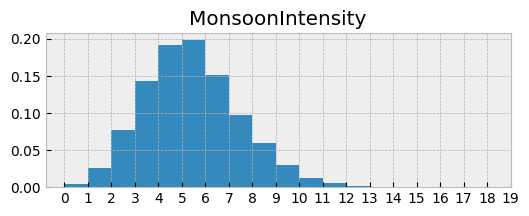

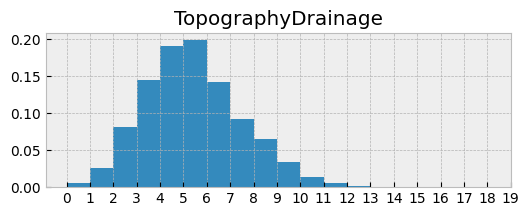

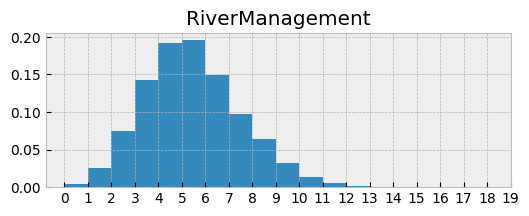

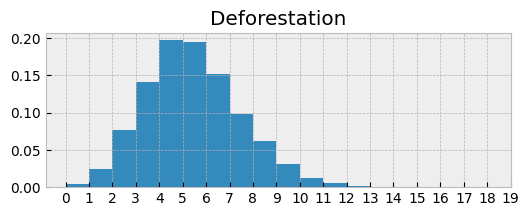

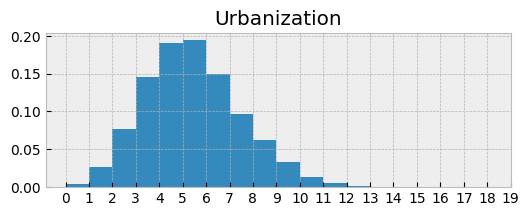

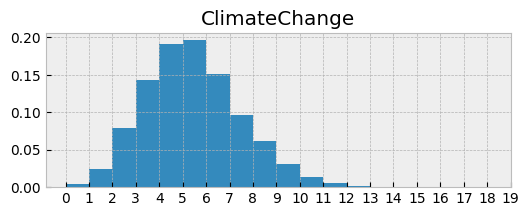

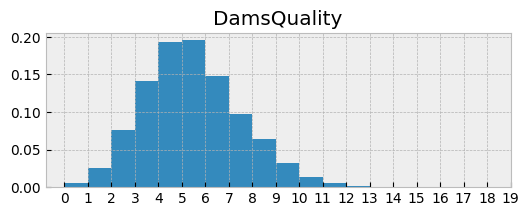

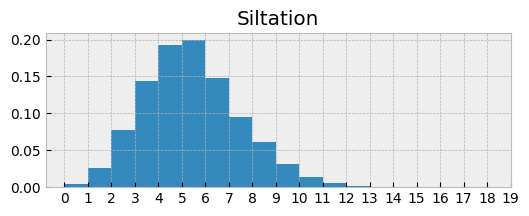

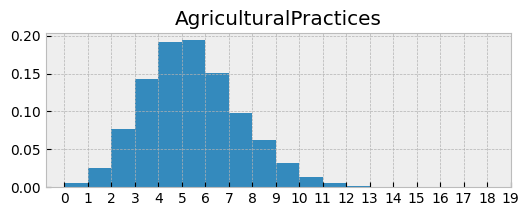

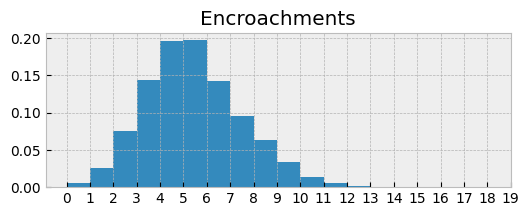

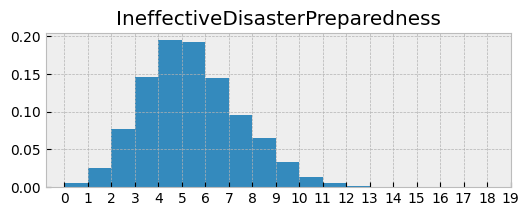

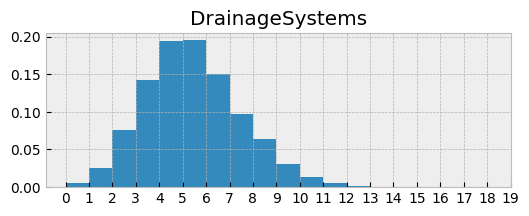

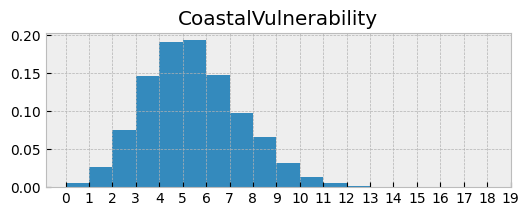

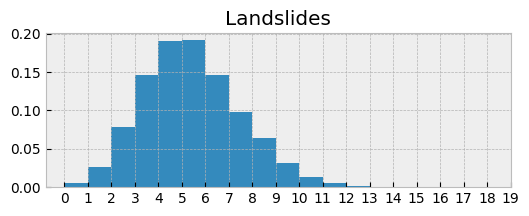

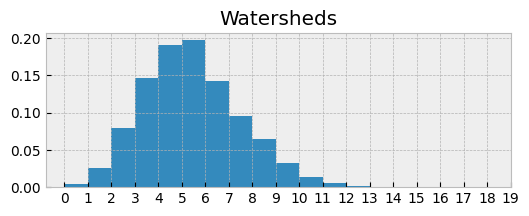

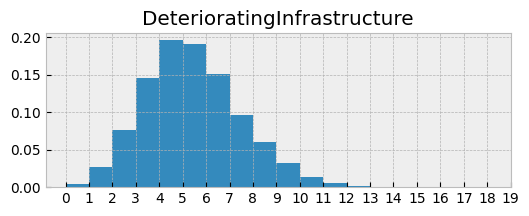

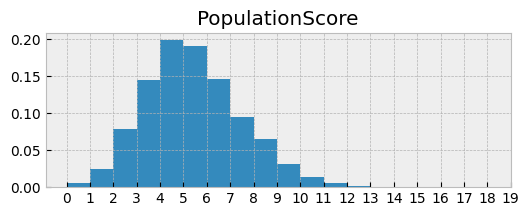

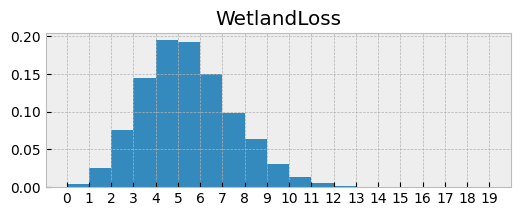

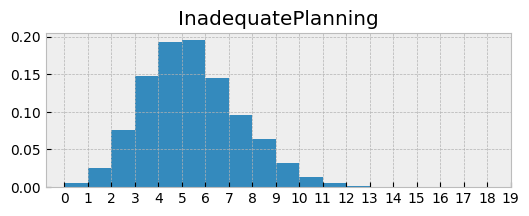

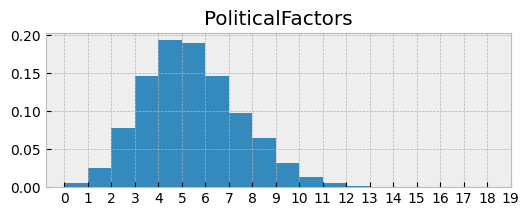

In [7]:
for col in cols:
    fig, ax = plt.subplots(figsize=(6,2))
    max_val = round(train[col].max()) + 1
    train[col].hist(density=True,bins = np.arange(0,max_val,1), ax=ax)
    plt.xticks(np.arange(0,20,1))
    plt.title(col)
    plt.show()

## Descriptive analysis
The data shows that all variables have a median of 5 and a mean of 4.9, with variance and standard deviation nearly identical across the board. There is a moderate right skew in the data distribution.

In [8]:
round(train.agg(['min','mean','median','max','var','std','skew']),2).T

,min,mean,median,max,var,std,skew
MonsoonIntensity,0.00,4.92,5.00,16.00,4.23,2.06,0.44
TopographyDrainage,0.00,4.93,5.00,18.00,4.38,2.09,0.46
RiverManagement,0.00,4.96,5.00,16.00,4.29,2.07,0.43
Deforestation,0.00,4.94,5.00,17.00,4.21,2.05,0.43
Urbanization,0.00,4.94,5.00,17.00,4.34,2.08,0.44
ClimateChange,0.00,4.93,5.00,17.00,4.23,2.06,0.43
DamsQuality,0.00,4.96,5.00,16.00,4.34,2.08,0.44
Siltation,0.00,4.93,5.00,16.00,4.27,2.07,0.45
AgriculturalPractices,0.00,4.94,5.00,16.00,4.28,2.07,0.42
Encroachments,0.00,4.95,5.00,18.00,4.34,2.08,0.46


In [9]:
round(test.agg(['min','mean','median','max','var','std','skew']),2).T

,min,mean,median,max,var,std,skew
MonsoonIntensity,0.00,4.92,5.00,16.00,4.23,2.06,0.44
TopographyDrainage,0.00,4.93,5.00,17.00,4.39,2.09,0.46
RiverManagement,0.00,4.96,5.00,16.00,4.29,2.07,0.41
Deforestation,0.00,4.95,5.00,17.00,4.21,2.05,0.44
Urbanization,0.00,4.94,5.00,17.00,4.33,2.08,0.45
ClimateChange,0.00,4.93,5.00,17.00,4.24,2.06,0.43
DamsQuality,0.00,4.96,5.00,16.00,4.37,2.09,0.44
Siltation,0.00,4.93,5.00,16.00,4.28,2.07,0.45
AgriculturalPractices,0.00,4.95,5.00,16.00,4.30,2.07,0.42
Encroachments,0.00,4.95,5.00,17.00,4.33,2.08,0.45


## Correlation
There is no correlation between variables

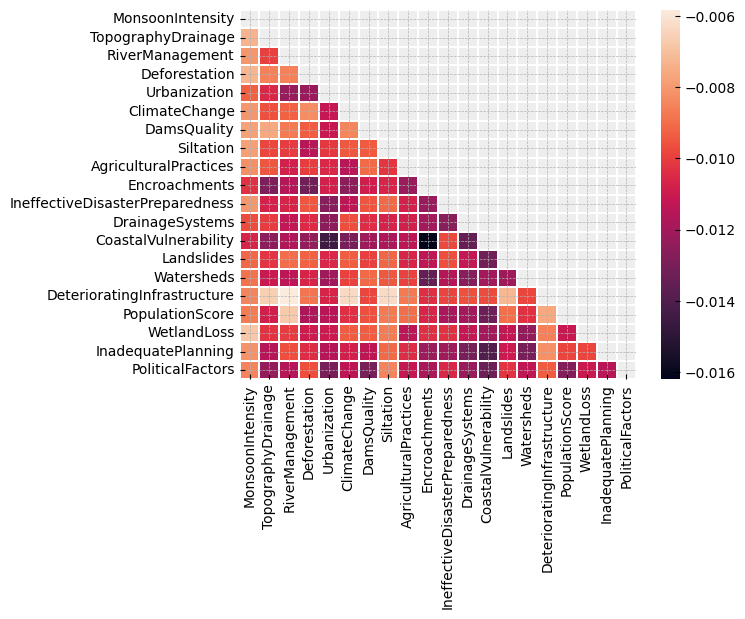

In [10]:
corr = train.drop('FloodProbability', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask,linewidth=0.1)
plt.show()

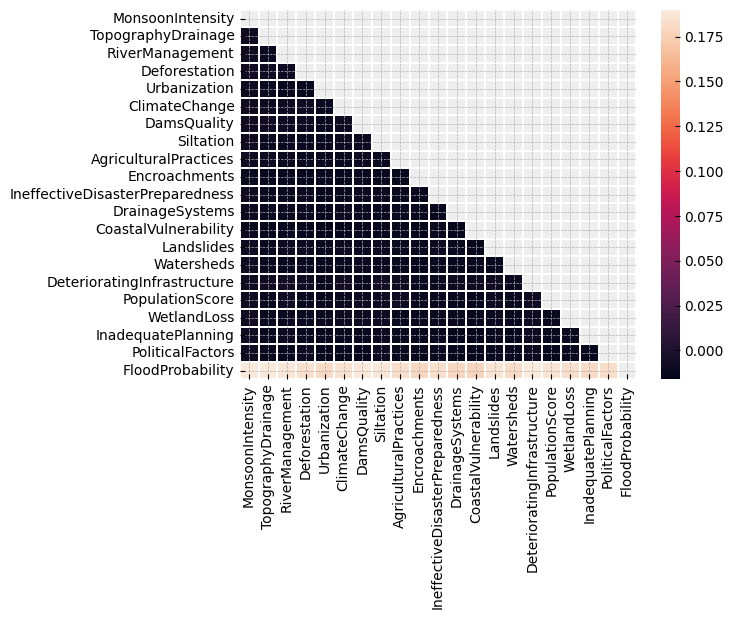

In [11]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask,linewidth=0.1)
plt.show()

# Preprocessing
## Outliers
All variables have outliers

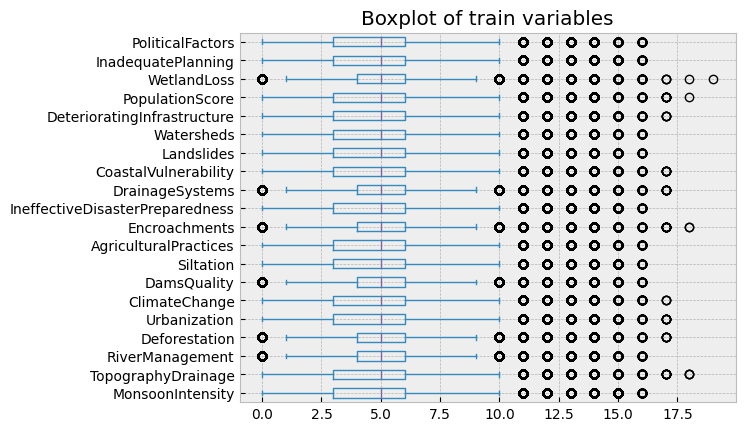

In [12]:
train.drop('FloodProbability', axis=1).plot(kind='box',vert=False)
plt.title('Boxplot of train variables')
plt.show()

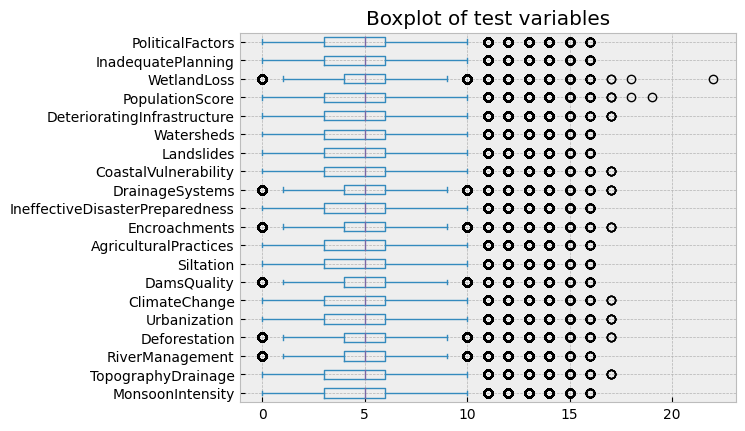

In [13]:
test.plot(kind='box',vert=False)
plt.title('Boxplot of test variables')
plt.show()

### Removing outliers

In [14]:
for col in cols:
    col_iqr = iqr(train[col])
    Q1, Q3 = np.quantile(train[col], [0.25, 0.75])
    
    # Convert outliers to np.nan
    train.loc[train[col] < (Q1 - 1.5*col_iqr), col] = np.nan
    train.loc[train[col] > (Q3 + 1.5*col_iqr), col] = np.nan    

Fraction of outliers is less than 3% in each variable. We can drop the outliers.

In [15]:
train.isna().sum()/train.shape[0]

MonsoonIntensity                  0.01
TopographyDrainage                0.01
RiverManagement                   0.03
Deforestation                     0.03
Urbanization                      0.01
ClimateChange                     0.01
DamsQuality                       0.03
Siltation                         0.01
AgriculturalPractices             0.01
Encroachments                     0.03
IneffectiveDisasterPreparedness   0.01
DrainageSystems                   0.03
CoastalVulnerability              0.01
Landslides                        0.01
Watersheds                        0.01
DeterioratingInfrastructure       0.01
PopulationScore                   0.01
WetlandLoss                       0.03
InadequatePlanning                0.01
PoliticalFactors                  0.01
FloodProbability                  0.00
dtype: float64

In [16]:
print('Shape before :',train.shape)
train.dropna(how='any', inplace=True)
print("Shape after :",train.shape)

Shape before : (1117957, 21)
Shape after : (849100, 21)


In [17]:
y = train['FloodProbability']
X = train.drop('FloodProbability', axis=1)

In [18]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)
test[test.columns] = scaler.transform(test)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =  987)

# Modelling

In [19]:
from sklearn.linear_model import BayesianRidge, ElasticNetCV

In [20]:
# reg = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=r2_score)
# models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# print(models)

In [21]:
# regressors = [
#     ('bayesian ridge', BayesianRidge()),
#     ('elastic net',ElasticNetCV()),
#     ('linear_reg', LinearRegression()),
#     ('random forest',RandomForestRegressor()) 
# ]

In [22]:
# evals = {}
# for clf, model in regressors:
#     model.fit(X_train,y_train)
#     y_pred = model.predict(X_test)
#     score = r2_score(y_test, y_pred)
#     evals[clf] = score

In [23]:
# evals_df = pd.DataFrame({'model':evals.keys(),'r2_score':evals.values()})
# evals_df.sort_values('r2_score', inplace = True)
# evals_df

In [24]:
# sns.pointplot(y='model',x='r2_score',data=evals_df)
# plt.show()

# Hyperparameter tuning

In [25]:
# Define the models
models = {
    'bayesian_ridge': BayesianRidge(),
    'elastic_net': ElasticNetCV(cv=5),
    'linear_reg': LinearRegression()
}

# Define the parameter grids for each model
param_grids = {
    'bayesian_ridge': {
        'alpha_1': [1e-6, 1e-5],
        'alpha_2': [1e-6, 1e-4],
        'lambda_1': [1e-6, 1e-5],
        'lambda_2': [1e-6,1e-5]
    },
    'elastic_net': {
    },
    'linear_reg': {
        'fit_intercept': [True, False]
    }
}

# Initialize the GridSearchCV for each model
grid_searches = {
    name: GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=0)
                 for name, (model, param_grid) in zip(models.keys(), zip(models.values(), 
                                                                         param_grids.values()))}

# Assume you have a dataset X (features) and y (target)
best_estimators = {}

# Fit the GridSearchCV for each model
for name, gs in grid_searches.items():
    print(f"Running GridSearchCV for {name}")
    gs.fit(X, y)
    print(f"Best parameters for {name}: {gs.best_params_}")
    print(f"Best score for {name}: {gs.best_score_}")
    best_estimators[name] = gs.best_estimator_


Running GridSearchCV for bayesian_ridge
Best parameters for bayesian_ridge: {'alpha_1': 1e-06, 'alpha_2': 0.0001, 'lambda_1': 1e-06, 'lambda_2': 1e-05}
Best score for bayesian_ridge: 0.8340004903357052
Running GridSearchCV for elastic_net
Best parameters for elastic_net: {}
Best score for elastic_net: 0.8339995612734162
Running GridSearchCV for linear_reg
Best parameters for linear_reg: {'fit_intercept': True}
Best score for linear_reg: 0.8340004903275485


# Predictions

In [26]:
# Print the best estimators
for name, estimator in best_estimators.items():
    print(f"Best estimator for {name}: {estimator}")

# Create a VotingRegressor using the best estimators
voting_regressor = VotingRegressor(estimators=[
    ('bayesian_ridge', best_estimators['bayesian_ridge']),
    ('elastic_net', best_estimators['elastic_net']),
    ('linear_reg', best_estimators['linear_reg'])
])

# Fit the VotingRegressor on the dataset
voting_regressor.fit(X, y)
y_preds = voting_regressor.predict(test)

Best estimator for bayesian_ridge: BayesianRidge(alpha_2=0.0001, lambda_2=1e-05)
Best estimator for elastic_net: ElasticNetCV(cv=5)
Best estimator for linear_reg: LinearRegression()


In [27]:
submission = pd.DataFrame({'id':test.index, 'FloodProbability':y_preds})
submission

,id,FloodProbability
0,1117957,0.57
1,1117958,0.46
2,1117959,0.45
3,1117960,0.47
4,1117961,0.47
...,...,...
745300,1863257,0.48
745301,1863258,0.45
745302,1863259,0.62
745303,1863260,0.55


In [28]:
submission.to_csv('/kaggle/working/submission.csv',index=False)